In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
%matplotlib inline

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


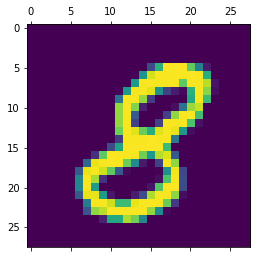

In [4]:
plt.matshow(mnist.train.images[5].reshape(28, 28))
print(mnist.train.labels[5])

In [19]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [25]:
train_steps = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [26]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [27]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_steps, feed_dict={x: batch_xs, y_: batch_ys})

In [28]:
cross_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
acc = tf.reduce_mean(tf.cast(cross_pred, tf.float32))

In [29]:
print(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9006


[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


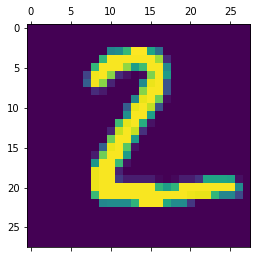

In [33]:
plt.matshow(mnist.test.images[1].reshape(28, 28))
print(mnist.test.labels[1])